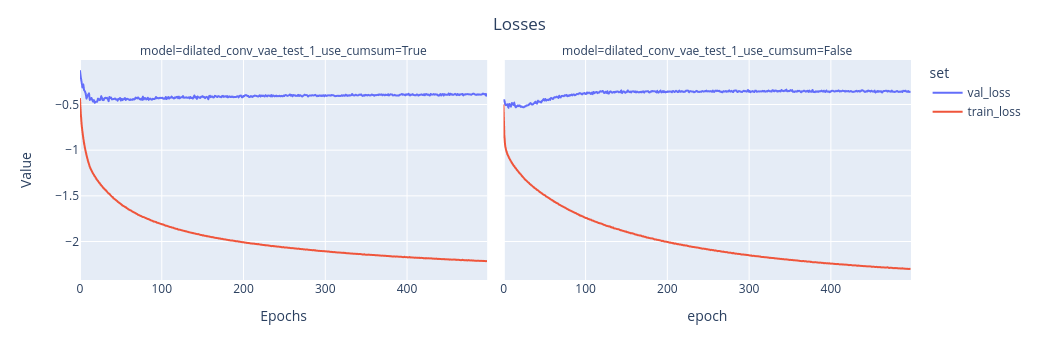

In [1]:
import plotly.express as px
import pandas as pd
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')

fig_losses = px.line(tot_losses,x = 'epoch',y='loss',color = 'set',facet_col='model',width = 2600)
#fig_losses.update_traces(mode="markers+lines", hovertemplate=None)
#fig_losses.update_layout(hovermode="x unified")
fig_losses.update_layout(title = {'text':f'Losses', 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    
fig_losses

In [2]:
tot_losses

Unnamed: 0  epoch         set      loss  \
0              0      0    val_loss -0.133385   
1              1      1    val_loss -0.206245   
2              2      2    val_loss -0.256450   
3              3      3    val_loss -0.313719   
4              4      4    val_loss -0.279667   
...          ...    ...         ...       ...   
1991        1991    494  train_loss -2.297351   
1992        1992    495  train_loss -2.300665   
1993        1993    496  train_loss -2.299259   
1994        1994    497  train_loss -2.299997   
1995        1995    498  train_loss -2.299001   

                                         model  
0      dilated_conv_vae_test_1_use_cumsum=True  
1      dilated_conv_vae_test_1_use_cumsum=True  
2      dilated_conv_vae_test_1_use_cumsum=True  
3      dilated_conv_vae_test_1_use_cumsum=True  
4      dilated_conv_vae_test_1_use_cumsum=True  
...                                        ...  
1991  dilated_conv_vae_test_1_use_cumsum=False  
1992  dilated_conv_vae_test_1_use_cumsum=False  
1993  dilated_conv_vae_test_1_use_cumsum=False  
1994  dilated_conv_vae_test_1_use_cumsum=False  
1995  dilated_conv_vae_test_1_use_cumsum=False  

[1996 rows x 5 columns]

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_LOSSES.csv')

for c in tot_losses.model.unique():
    if 'triplet' in c:
        fig_losses = px.line(tot_losses[tot_losses.model==c],x = 'epoch',y='loss',color = 'set')
        fig_losses.update_layout(title = {'text':f'Losses '+c, 'x':0.5},
                      xaxis_title={'text':'Epochs'},
                      yaxis_title={'text':'Value'},

                        )
        fig_losses.show()

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)
#tot_pred.y_median[tot_pred.model=='d3vae_weather_1'] = tot_pred.y_pred[tot_pred.model=='d3vae_weather_1']
#tot_pred.y_median[tot_pred.model=='persistent_weather_1'] = tot_pred.y_pred[tot_pred.model=='persistent_weather_1']

In [5]:
tot_pred

Unnamed: 0  lag                 time         y    y_pred  \
0                 0    1  2020-10-20 06:00:00  0.414501  0.689095   
666432       666432    1  2020-10-20 06:00:00  0.414501  1.325572   
676845       676845    2  2020-10-20 06:10:00  0.294546  1.272278   
666433       666433    1  2020-10-20 06:10:00  0.294546  1.260097   
10413         10413    2  2020-10-20 06:10:00  0.294546  0.865360   
...             ...  ...                  ...       ...       ...   
656018       656018   63  2020-12-31 23:40:00  0.606429  0.088345   
1322450     1322450   63  2020-12-31 23:40:00  0.606429 -0.113344   
666430       666430   64  2020-12-31 23:40:00  0.606429  0.095178   
666431       666431   64  2020-12-31 23:50:00  0.528458  0.082156   
1332863     1332863   64  2020-12-31 23:50:00  0.528458 -0.102265   

             prediction_time                                     model  
0        2020-10-20 05:50:00   dilated_conv_vae_test_1_use_cumsum=True  
666432   2020-10-20 05:50:00  dilated_conv_vae_test_1_use_cumsum=False  
676845   2020-10-20 05:50:00  dilated_conv_vae_test_1_use_cumsum=False  
666433   2020-10-20 06:00:00  dilated_conv_vae_test_1_use_cumsum=False  
10413    2020-10-20 05:50:00   dilated_conv_vae_test_1_use_cumsum=True  
...                      ...                                       ...  
656018   2020-12-31 13:10:00   dilated_conv_vae_test_1_use_cumsum=True  
1322450  2020-12-31 13:10:00  dilated_conv_vae_test_1_use_cumsum=False  
666430   2020-12-31 13:00:00   dilated_conv_vae_test_1_use_cumsum=True  
666431   2020-12-31 13:10:00   dilated_conv_vae_test_1_use_cumsum=True  
1332863  2020-12-31 13:10:00  dilated_conv_vae_test_1_use_cumsum=False  

[1332864 rows x 7 columns]

In [6]:
try:
    tot_pred.y_pred[pd.isnull(tot_pred.y_pred)] = tot_pred.y_median[pd.isnull(tot_pred.y_pred)] 
except:
    tot_pred['y_pred'] = tot_pred.y_median.values

AttributeError: 'DataFrame' object has no attribute 'y_median'

In [9]:
tot_pred.lag.max()

64

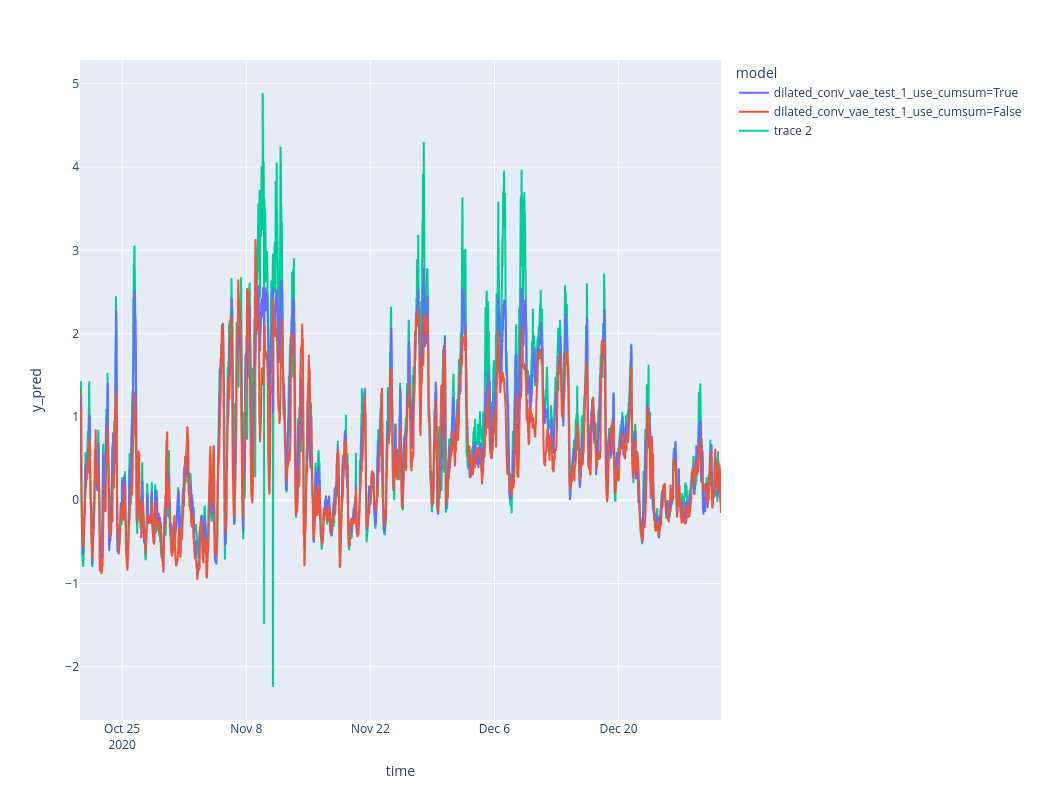

In [12]:
lag=1
fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='y_pred', color='model',height=800)
fig.add_scatter(x = tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].time, y=tot_pred[(tot_pred.lag==lag) & (tot_pred.model==tot_pred.model.unique()[0])].y)


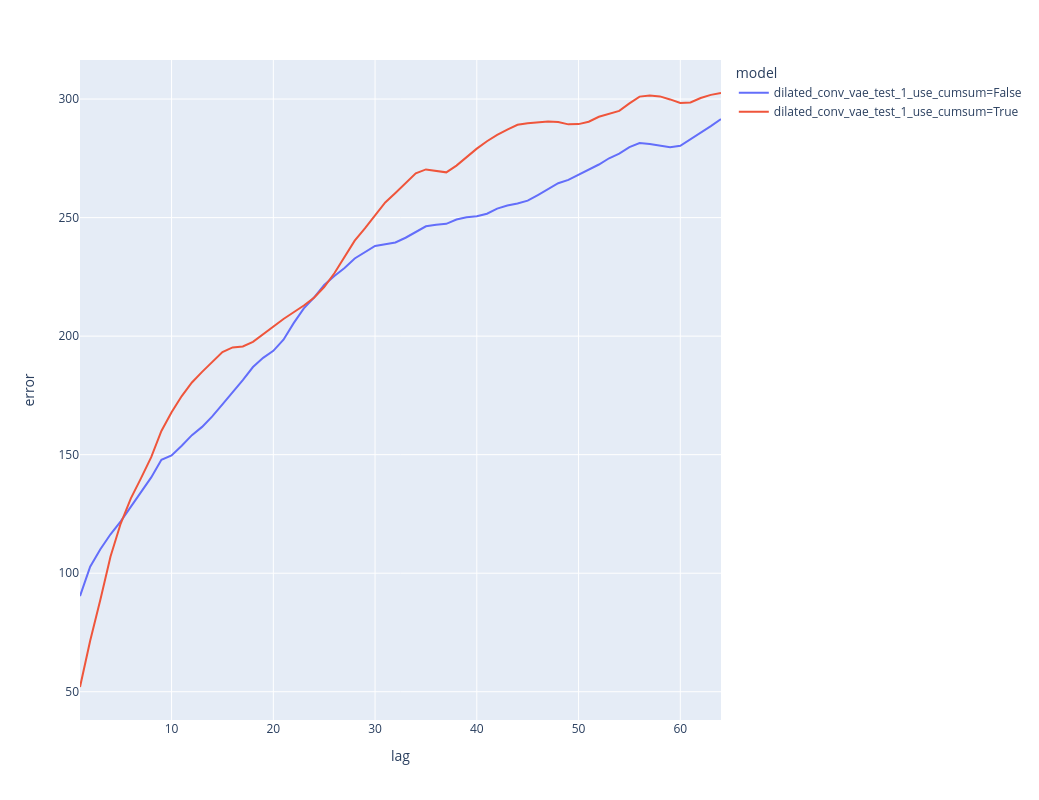

In [11]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_pred)/x.y)).reset_index().rename(columns={0:'error'}) 
import numpy as np
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show() #150--400

In [13]:
tot_pred.time = pd.to_datetime(tot_pred.time)
from datetime import timedelta

tot_pred['prediction_time'] = tot_pred.apply(lambda x: x.time-timedelta(minutes=10*x.lag), axis=1)

In [14]:
tot_pred = tot_pred.reset_index().drop(columns = ['index','Unnamed: 0'])

In [15]:
tot_pred.model.unique()

array(['tft_weather_1_loss_type=multiplicative_ivpersistence_weight=1',
       'linear_d_1_loss_type=high_orderpersistence_weight=1',
       'linear_d_1_loss_type=multiplicative_ivpersistence_weight=1',
       'patchtst_weather_1_loss_type=high_orderpersistence_weight=1',
       'patchtst_weather_1_loss_type=global_ivpersistence_weight=1',
       'patchtst_weather_1_loss_type=msepersistence_weight=1',
       'patchtst_weather_1_loss_type=additive_ivpersistence_weight=1',
       'patchtst_weather_1_loss_type=multiplicative_ivpersistence_weight=1',
       'patchtst_weather_1_loss_type=sinkhornpersistence_weight=1',
       'patchtst_weather_1_loss_type=tripletpersistence_weight=1',
       'tft_weather_1_loss_type=linear_penalizationpersistence_weight=1',
       'patchtst_weather_1_loss_type=dilatedpersistence_weight=1',
       'linear_d_1_loss_type=global_ivpersistence_weight=1',
       'tft_weather_1_loss_type=tripletpersistence_weight=1',
       'tft_weather_1_loss_type=high_orderpersis

In [16]:
persistence = tot_pred[(tot_pred.model==tot_pred.model.unique()[0]) & (tot_pred.lag==1) ].drop_duplicates()
persistence = persistence[['prediction_time','y_pred']].rename(columns={'y_pred':'y_prec'}).reset_index()[['prediction_time','y_prec']]


In [17]:
persistence

prediction_time    y_prec
0     2020-10-20 05:50:00  0.510943
1     2020-10-20 06:00:00  0.444207
2     2020-10-20 06:10:00  0.350935
3     2020-10-20 06:20:00  0.292188
4     2020-10-20 06:30:00  0.283415
...                   ...       ...
10408 2020-12-31 12:30:00 -0.107779
10409 2020-12-31 12:40:00 -0.088466
10410 2020-12-31 12:50:00 -0.120095
10411 2020-12-31 13:00:00 -0.121186
10412 2020-12-31 13:10:00 -0.132191

[10413 rows x 2 columns]

In [18]:
tot_pred_new = pd.merge(tot_pred,persistence,on='prediction_time',how='left')

In [19]:
tot_pred_new = tot_pred_new.sort_values(by=['prediction_time','model','lag'])

In [20]:
tot_pred_new_prec = tot_pred_new[tot_pred_new.model == tot_pred_new.model.values[0]]

In [21]:
tot_pred_new_prec.model = 'persistent'
tot_pred_new_prec.y_pred = tot_pred_new_prec.y_prec
tot_pred_new = pd.concat([tot_pred_new,tot_pred_new_prec],ignore_index=True)

/tmp/ipykernel_5533/1064679427.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5533/1064679427.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
WEIGHT = 1
def compute(x,alpha=1):

    try:
        prec = x.y_prec[x.lag==1].values[0]
    except:
        return None,None
    #prec = x.y_pred.values.mean()
    error = np.abs(x.y_pred.values-x.y.values)
    scostamento_persistente = np.abs(x.y_pred.values-prec)


    return error.mean(),scostamento_persistente.mean(),(error*(1+WEIGHT*np.exp(-scostamento_persistente))).mean()

def compute_fun(x):
    error, scostamento, tot_error = compute(x)
    return pd.Series({'error':error if error is not None else np.nan, 
                      'error_p':scostamento if scostamento is not None else np.nan,
                      'error_tot':tot_error if tot_error is not None else np.nan})

In [23]:
agg = tot_pred_new.groupby(['prediction_time','model']).apply(compute_fun).reset_index().dropna()


In [28]:
agg.groupby('model')[['error','error_p','error_tot']].mean().reset_index().sort_values(by='error')

model     error   error_p  \
20                                         persistent  0.515721  0.000000   
22  tft_weather_1_loss_type=dilatedpersistence_wei...  0.546994  0.497626   
18  patchtst_weather_1_loss_type=sinkhornpersisten...  0.547600  0.479746   
10  patchtst_weather_1_loss_type=additive_ivpersis...  0.550998  0.574477   
16  patchtst_weather_1_loss_type=msepersistence_we...  0.555503  0.598773   
1    linear_d_1_loss_type=dilatedpersistence_weight=1  0.562135  0.461110   
28  tft_weather_1_loss_type=multiplicative_ivpersi...  0.566663  0.476917   
15  patchtst_weather_1_loss_type=linear_penalizati...  0.566768  0.589883   
2   linear_d_1_loss_type=exponential_penalizationp...  0.570589  0.489628   
23  tft_weather_1_loss_type=exponential_penalizati...  0.571975  0.540168   
27    tft_weather_1_loss_type=msepersistence_weight=1  0.572705  0.530105   
13  patchtst_weather_1_loss_type=global_ivpersiste...  0.579592  0.629518   
9    linear_d_1_loss_type=tripletpersistence_weight=1  0.582747  0.505896   
21  tft_weather_1_loss_type=additive_ivpersistence...  0.591072  0.549601   
24  tft_weather_1_loss_type=global_ivpersistence_w...  0.591072  0.554155   
26  tft_weather_1_loss_type=linear_penalizationper...  0.596605  0.544469   
29  tft_weather_1_loss_type=sinkhornpersistence_we...  0.610310  0.571722   
30  tft_weather_1_loss_type=tripletpersistence_wei...  0.618080  0.598000   
5   linear_d_1_loss_type=linear_penalizationpersis...  0.635376  0.571278   
0   linear_d_1_loss_type=additive_ivpersistence_we...  0.635381  0.574451   
7   linear_d_1_loss_type=multiplicative_ivpersiste...  0.635444  0.574501   
25  tft_weather_1_loss_type=high_orderpersistence_...  0.652193  0.565794   
3   linear_d_1_loss_type=global_ivpersistence_weig...  0.654592  0.593536   
4   linear_d_1_loss_type=high_orderpersistence_wei...  0.677528  0.580475   
6        linear_d_1_loss_type=msepersistence_weight=1  0.685465  0.642984   
8   linear_d_1_loss_type=sinkhornpersistence_weight=1  0.787107  0.686073   
14  patchtst_weather_1_loss_type=high_orderpersist...  0.866407  0.820991   
11  patchtst_weather_1_loss_type=dilatedpersistenc...  0.945766  0.948889   
19  patchtst_weather_1_loss_type=tripletpersistenc...  0.950786  0.969689   
17  patchtst_weather_1_loss_type=multiplicative_iv...  0.955747  0.947219   
12  patchtst_weather_1_loss_type=exponential_penal...  0.975218  0.979733   

    error_tot  
20   1.031442  
22   0.838208  
18   0.869364  
10   0.819418  
16   0.829673  
1    0.879091  
28   0.877054  
15   0.840184  
2    0.879403  
23   0.864395  
27   0.866120  
13   0.850449  
9    0.891391  
21   0.881094  
24   0.876471  
26   0.894108  
29   0.908575  
30   0.910096  
5    0.942172  
0    0.941341  
7    0.941416  
25   0.969624  
3    0.954274  
4    1.019320  
6    0.990114  
8    1.139281  
14   1.195369  
11   1.260503  
19   1.258063  
17   1.268016  
12   1.282337

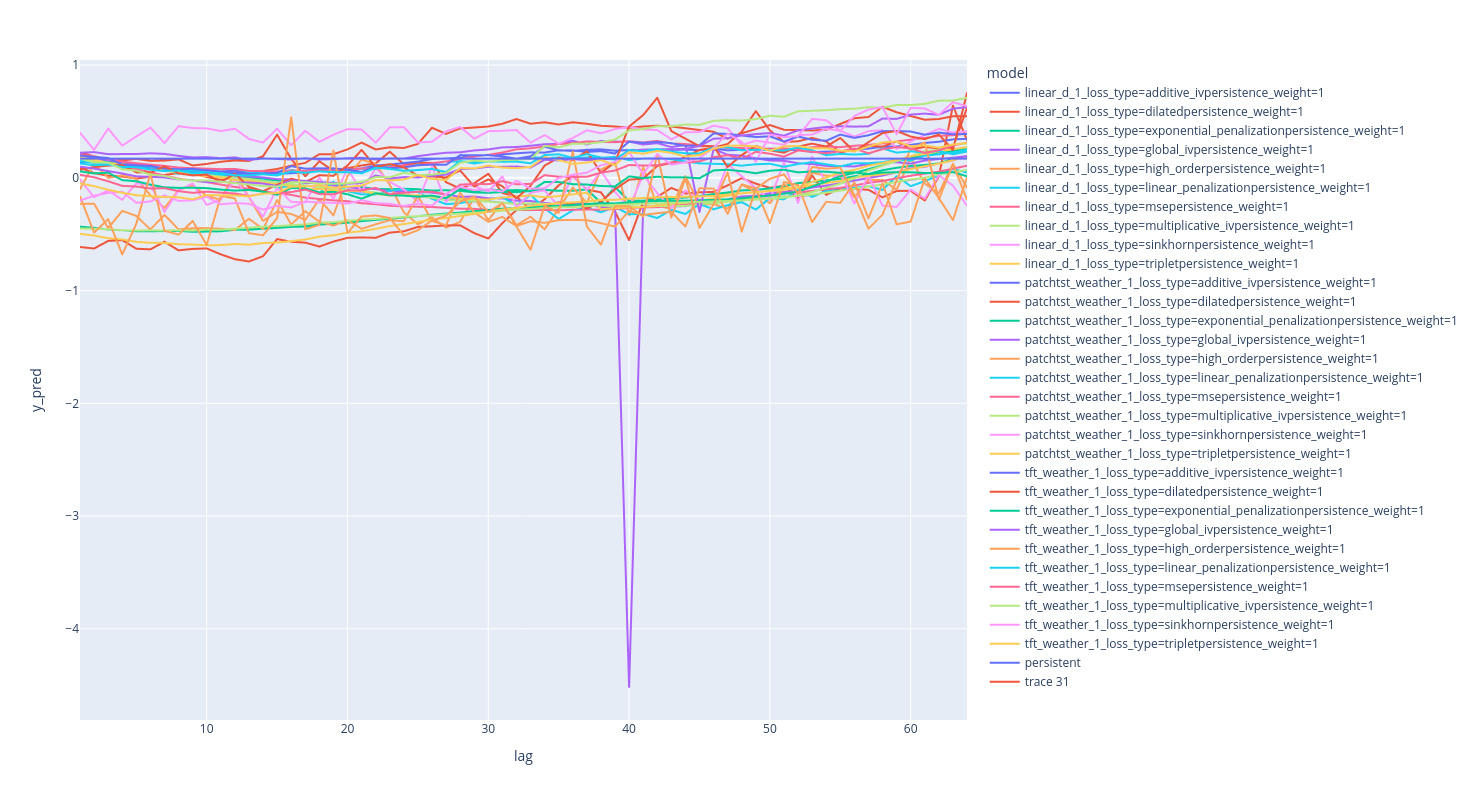

In [25]:
#27-11-2020
date  ='2020-12-19 13:20:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

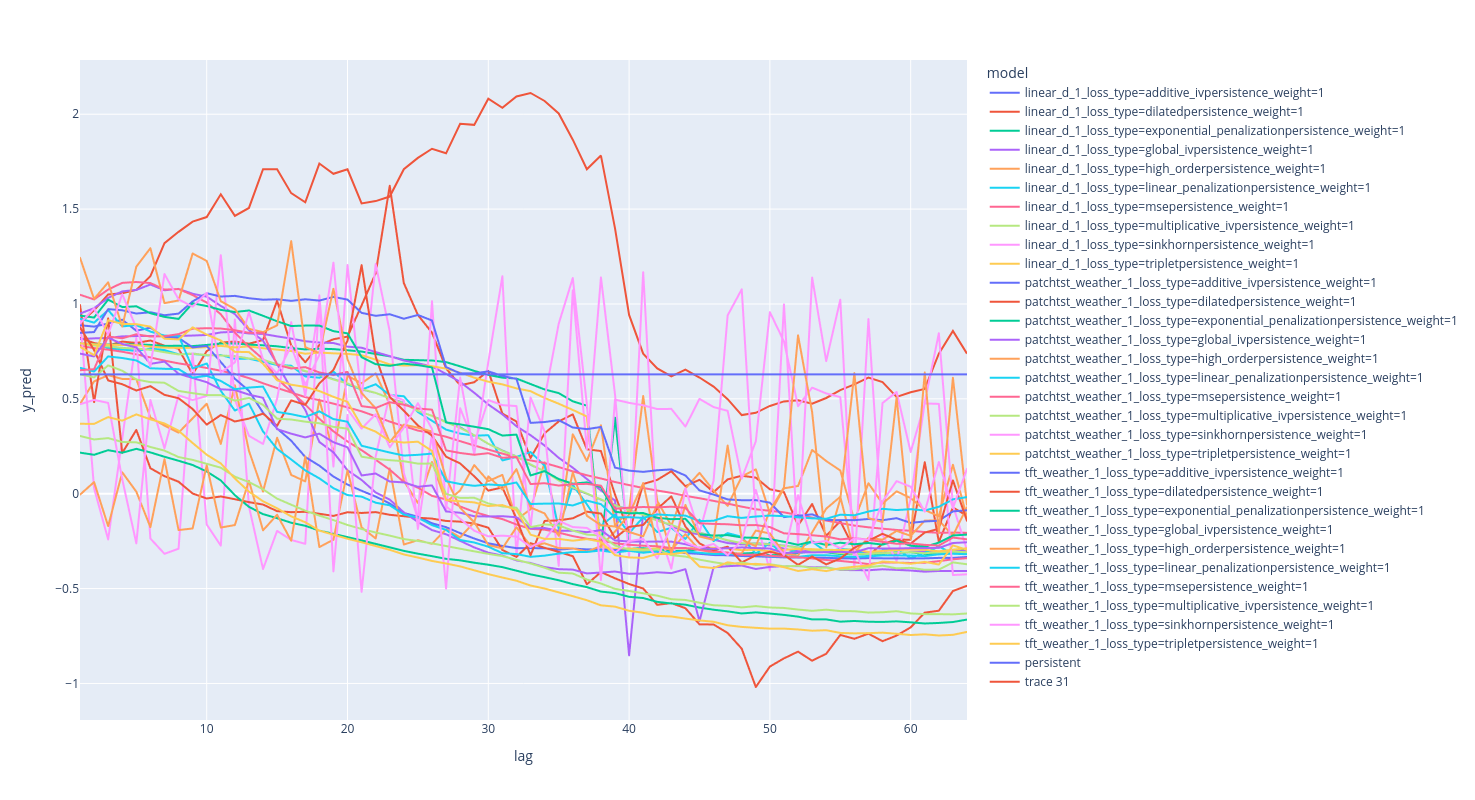

In [26]:
date  ='2020-12-08 05:30:00'
subset = tot_pred_new[(tot_pred_new.prediction_time==date)]
fig = px.line(subset, x='lag', y='y_pred', color='model',height=800)
fig.add_scatter(x = subset.lag[subset.model==subset.model.unique()[0]], y=subset.y[subset.model==subset.model.unique()[0]])

fig.show()

In [118]:

class SinkhornDistance():
    r"""
    Given two empirical measures each with :math:`P_1` locations
    :math:`x\in\mathbb{R}^{D_1}` and :math:`P_2` locations :math:`y\in\mathbb{R}^{D_2}`,
    outputs an approximation of the regularized OT cost for point clouds.

    Args:
        eps (float): regularization coefficient
        max_iter (int): maximum number of Sinkhorn iterations
        reduction (string, optional): Specifies the reduction to apply to the output:
            'none' | 'mean' | 'sum'. 'none': no reduction will be applied,
            'mean': the sum of the output will be divided by the number of
            elements in the output, 'sum': the output will be summed. Default: 'none'

    Shape:
        - Input: :math:`(N, P_1, D_1)`, :math:`(N, P_2, D_2)`
        - Output: :math:`(N)` or :math:`()`, depending on `reduction`
    """
    def __init__(self, eps, max_iter, reduction='none'):
        super(SinkhornDistance, self).__init__()
        self.eps = eps
        self.max_iter = max_iter
        self.reduction = reduction

    def compute(self, x, y):
        # The Sinkhorn algorithm takes as input three variables :
        C = self._cost_matrix(x, y).to(x.device)  # Wasserstein cost function
        x_points = x.shape[-2]
        y_points = y.shape[-2]
        if x.dim() == 2:
            batch_size = 1
        else:
            batch_size = x.shape[0]

        # both marginals are fixed with equal weights
        mu = torch.empty(batch_size, x_points, dtype=torch.float,
                         requires_grad=False).fill_(1.0 / x_points).squeeze().to(x.device)
        nu = torch.empty(batch_size, y_points, dtype=torch.float,
                         requires_grad=False).fill_(1.0 / y_points).squeeze().to(x.device)

        u = torch.zeros_like(mu).to(x.device)
        v = torch.zeros_like(nu).to(x.device)
        # To check if algorithm terminates because of threshold
        # or max iterations reached
        actual_nits = 0
        # Stopping criterion
        thresh = 1e-1

        # Sinkhorn iterations
        for i in range(self.max_iter):
            u1 = u  # useful to check the update
            u = self.eps * (torch.log(mu+1e-8) - torch.logsumexp(self.M(C, u, v), dim=-1)) + u
            v = self.eps * (torch.log(nu+1e-8) - torch.logsumexp(self.M(C, u, v).transpose(-2, -1), dim=-1)) + v
            err = (u - u1).abs().sum(-1).mean()

            actual_nits += 1
            if err.item() < thresh:
                break

        U, V = u, v
        # Transport plan pi = diag(a)*K*diag(b)
        pi = torch.exp(self.M(C, U, V))
        # Sinkhorn distance
        cost = torch.sum(pi * C, dim=(-2, -1))

        if self.reduction == 'mean':
            cost = cost.mean()
        elif self.reduction == 'sum':
            cost = cost.sum()

        return cost#, pi, C

    def M(self, C, u, v):
        "Modified cost for logarithmic updates"
        "$M_{ij} = (-c_{ij} + u_i + v_j) / \epsilon$"
        return (-C + u.unsqueeze(-1) + v.unsqueeze(-2)) / self.eps

    @staticmethod
    def _cost_matrix(x, y, p=2):
        "Returns the matrix of $|x_i-y_j|^p$."
        x_col = x.unsqueeze(-2)
        y_lin = y.unsqueeze(-3)
        C = torch.sum((torch.abs(x_col - y_lin)) ** p, -1)
        return C

    @staticmethod
    def ave(u, u1, tau):
        "Barycenter subroutine, used by kinetic acceleration through extrapolation."
        return tau * u + (1 - tau) * u1

In [77]:
dd = list(tot_pred_new.prediction_time.unique())

In [78]:
import random
dates = random.sample(dd,64)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(tot_pred_new[tot_pred_new.model=='persistent_persistent_1_loss_type=linear'].y.values.reshape(-1,1))

In [154]:
tot_pred_new.y = scaler.transform(tot_pred_new.y.values.reshape(-1,1)).flatten()

In [155]:
tot_pred_new.y_pred = scaler.transform(tot_pred_new.y_pred.values.reshape(-1,1)).flatten()

In [156]:
date  ='2020-12-08 17:30:00'
models = 'linear_n_1_loss_type=linear'
model_y=[]
persistent = 'persistent_persistent_1_loss_type=linear'
persistent_y = []
real_y =[]
for d in dates:
    model_y.append(tot_pred_new[(tot_pred_new.prediction_time==d) & (tot_pred_new.model==models)].y_pred.values)
    persistent_y.append(tot_pred_new[(tot_pred_new.prediction_time==d) & (tot_pred_new.model==persistent)].y_pred.values)
    real_y.append(tot_pred_new[(tot_pred_new.prediction_time==d) & (tot_pred_new.model==models)].y.values)

In [157]:
import torch
torch.tensor(np.vstack(model_y))

tensor([[ 0.6100,  0.5917,  0.5716,  ...,  0.4808,  0.4801,  0.4802],
        [-0.0272, -0.0212, -0.0210,  ...,  0.0277,  0.0321,  0.0318],
        [ 1.9433,  1.9799,  2.0050,  ...,  2.0066,  1.9900,  1.9555],
        ...,
        [ 1.0910,  1.1224,  1.1474,  ...,  1.5262,  1.5605,  1.5775],
        [ 0.0166,  0.0175,  0.0137,  ...,  0.0216,  0.0227,  0.0192],
        [-0.6835, -0.6833, -0.6868,  ..., -0.7659, -0.7761, -0.7873]],
       dtype=torch.float64)

In [181]:
sink = SinkhornDistance(eps=0.1, max_iter=100, reduction='mean')

In [182]:
sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(real_y)))#168

tensor(0.9021, dtype=torch.float64)

In [183]:
sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(persistent_y)))#40

tensor(0.3329, dtype=torch.float64)

In [184]:
sink.compute(torch.tensor(np.vstack(persistent_y)),torch.tensor(np.vstack(real_y)))#205

tensor(1.0967, dtype=torch.float64)

In [187]:
sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(real_y)))+sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(real_y)))/(0.001+sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(persistent_y))))

tensor(3.6038, dtype=torch.float64)

In [188]:
sink.compute(torch.tensor(np.vstack(model_y)),torch.tensor(np.vstack(real_y)))+sink.compute(torch.tensor(np.vstack(persistent_y)),torch.tensor(np.vstack(real_y)))/(0.001+sink.compute(torch.tensor(np.vstack(persistent_y)),torch.tensor(np.vstack(persistent_y))))

tensor(30.5722, dtype=torch.float64)

In [75]:
triplet_loss = torch.nn.TripletMarginLoss(margin=1.0, p=2)

anchor = torch.tensor(np.vstack(model_y))
positive = torch.tensor(np.vstack(real_y))
negative = torch.tensor(np.vstack(persistent_y))
triplet_loss(anchor, positive, negative)

tensor(23.1787, dtype=torch.float64)

In [9]:
a = pd.DataFrame({'a':[1,2,3,4,1,2,1,3,4],'b':[1,1,1,1,2,2,3,3,3]})

In [10]:
a

a  b
0  1  1
1  2  1
2  3  1
3  4  1
4  1  2
5  2  2
6  1  3
7  3  3
8  4  3

In [15]:
empty = pd.DataFrame({'a':[1,2,3,4],'b':None})
empty

a     b
0  1  None
1  2  None
2  3  None
3  4  None

In [14]:
empty.merge(a, how='left')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [20]:
x = tot_pred
freq = timedelta(minutes=10)
groups = 'lag'

In [29]:
_min = x.groupby(groups).time.min().reset_index()
_max = x.groupby(groups).time.max().reset_index()
empty = []
for c in x[groups].unique():
    empty.append(pd.DataFrame({groups:c,'time':pd.date_range(_min.time[_min[groups]==c].values[0],_max.time[_max[groups]==c].values[0],freq=freq)}))

In [28]:
_min.time[_min[groups]==c]


0   2020-11-25 12:20:00
Name: time, dtype: datetime64[ns]

In [31]:
empty = pd.concat(empty,ignore_index=True)

In [32]:
empty

lag                time
0        1 2020-11-25 12:20:00
1        1 2020-11-25 12:30:00
2        1 2020-11-25 12:40:00
3        1 2020-11-25 12:50:00
4        1 2020-11-25 13:00:00
...    ...                 ...
83819   16 2020-12-31 23:10:00
83820   16 2020-12-31 23:20:00
83821   16 2020-12-31 23:30:00
83822   16 2020-12-31 23:40:00
83823   16 2020-12-31 23:50:00

[83824 rows x 2 columns]

In [39]:
ls = x.groupby(groups).time.count().reset_index()

In [38]:
ls =x[x.lag==14].iloc[0:100]

Unnamed: 0  lag                time      y       y_low    y_median  \
738699      738699   14 2020-11-25 14:30:00  424.8  424.038849  426.770508   
151931      151931   14 2020-11-25 14:30:00  424.8  422.056152  424.769135   
990171      990171   14 2020-11-25 14:30:00  424.8  418.154266  424.314056   
654875      654875   14 2020-11-25 14:30:00  424.8         NaN         NaN   
822523      822523   14 2020-11-25 14:30:00  424.8  427.286566  427.933333   
...            ...  ...                 ...    ...         ...         ...   
151938      151938   14 2020-11-25 15:40:00  424.5  420.329987  423.202484   
571058      571058   14 2020-11-25 15:40:00  424.5         NaN         NaN   
654882      654882   14 2020-11-25 15:40:00  424.5         NaN         NaN   
738706      738706   14 2020-11-25 15:40:00  424.5  421.909821  424.857819   
403410      403410   14 2020-11-25 15:40:00  424.5  414.108032  421.009216   

            y_high                                              model  \
738699  429.519562                                         linear_n_1   
151931  427.889648                                         linear_d_1   
990171  429.328003  rnn_gru_1_loss_type=high_orderpersistence_weig...   
654875         NaN                                 crossformer_test_1   
822523  428.580100                                         vva_test_1   
...            ...                                                ...   
151938  426.485474                                         linear_d_1   
571058         NaN                                    informer_test_1   
654882         NaN                                 crossformer_test_1   
738706  427.873230                                         linear_n_1   
403410  430.453918                                         linear_a_1   

            y_pred     prediction_time  
738699  426.770508 2020-11-25 12:10:00  
151931  424.769135 2020-11-25 12:10:00  
990171  424.314056 2020-11-25 12:10:00  
654875  423.567570 2020-11-25 12:10:00  
822523  427.933333 2020-11-25 12:10:00  
...            ...                 ...  
151938  423.202484 2020-11-25 13:20:00  
571058  421.426850 2020-11-25 13:20:00  
654882  424.806640 2020-11-25 13:20:00  
738706  424.857819 2020-11-25 13:20:00  
403410  421.009216 2020-11-25 13:20:00  

[100 rows x 10 columns]

In [41]:
ls[ls['lag']==13].time.values[0]

68107

In [37]:
x = np.array(range(20))/20

In [38]:
np.mean(x)

0.4749999999999999

In [50]:
np.var(x)

0.08312499999999999

In [42]:
from scipy.stats import skew

In [43]:
skew(x)

7.238236489080421e-16

In [46]:
def standardize_momentum(x,order):
    mean = np.mean(x)
    num = 0
    den = 0
    for i in range(len(x)):
        num+=(x[i]-mean)**(order)
        den+=(x[i]-mean)**(order-1)
    num=num/len(x)
    den=den/len(x)
    den = den**(order*1.0/order-1)
    return num/den

In [52]:
standardize_momentum(x,4)


0.012396015624999998

In [48]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

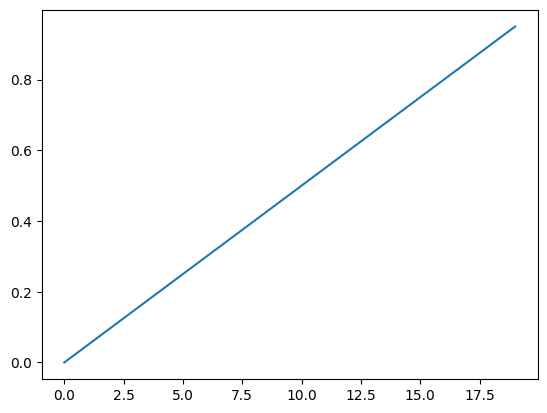

In [54]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(

In [55]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [56]:
y = np.array([0.5]*len(x))

In [60]:
z = (x+y)/2

In [62]:
np.mean((x-y)**2)

0.08375

In [2]:
tmp_real

Unnamed: 0  lag                 time         y    y_pred  \
374868      374868   37  2020-10-20 12:00:00 -0.593119 -0.639526   
374869      374869   37  2020-10-20 12:10:00 -0.641100 -0.597526   
374870      374870   37  2020-10-20 12:20:00 -0.671089 -0.721821   
374871      374871   37  2020-10-20 12:30:00 -0.677087 -0.675643   
374872      374872   37  2020-10-20 12:40:00 -0.737064 -0.464836   
...            ...  ...                  ...       ...       ...   
385276      385276   37  2020-12-31 18:40:00  0.342528 -0.166865   
385277      385277   37  2020-12-31 18:50:00  0.366519 -0.078402   
385278      385278   37  2020-12-31 19:00:00  0.390510 -0.124624   
385279      385279   37  2020-12-31 19:10:00  0.432494 -0.205512   
385280      385280   37  2020-12-31 19:20:00  0.498470 -0.198448   

                            model  
374868  linear_d_1_hidden_size=32  
374869  linear_d_1_hidden_size=32  
374870  linear_d_1_hidden_size=32  
374871  linear_d_1_hidden_size=32  
374872  linear_d_1_hidden_size=32  
...                           ...  
385276  linear_d_1_hidden_size=32  
385277  linear_d_1_hidden_size=32  
385278  linear_d_1_hidden_size=32  
385279  linear_d_1_hidden_size=32  
385280  linear_d_1_hidden_size=32  

[10413 rows x 6 columns]

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/weather_paper/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)




KeyboardInterrupt



In [22]:
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_pred)/x.y)).reset_index().rename(columns={0:'error'}) 
fig = px.line(error, x='lag', y='error', color='model',height=600,width=1000)
fig.update_layout(legend=dict(x=0.65,y=.1),font=dict(size=16)) 
fig.write_image('error.pdf')

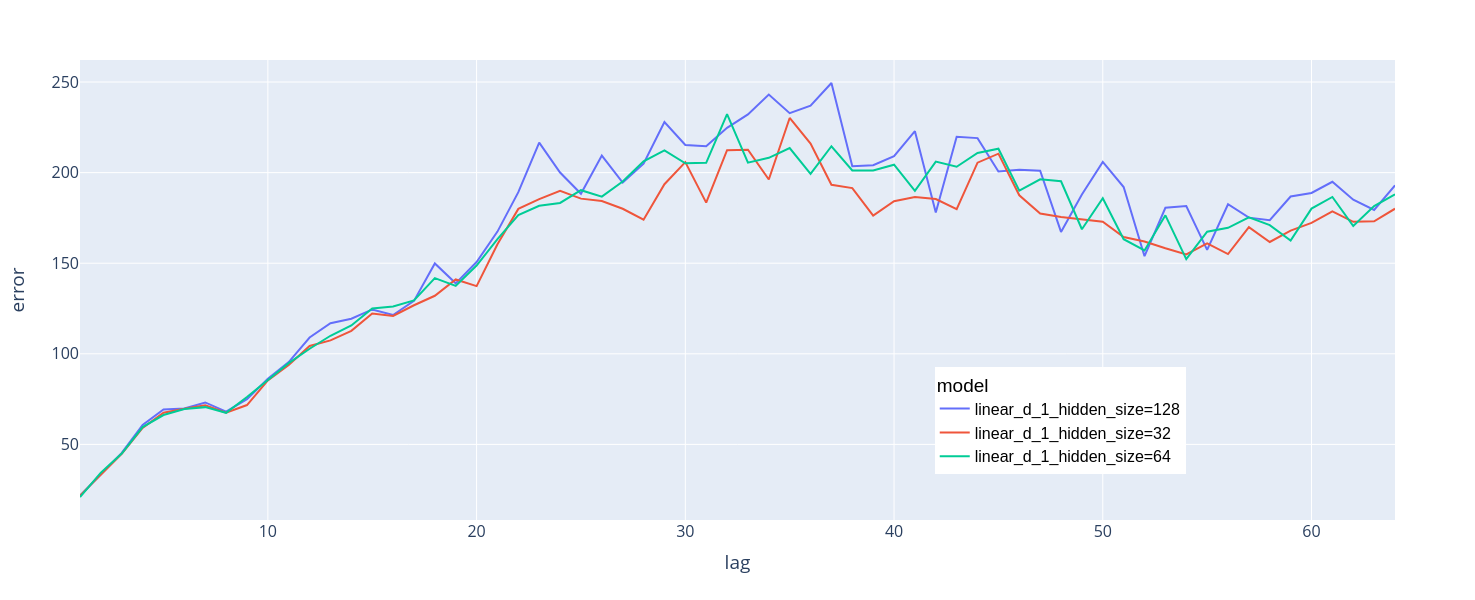